In [27]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import sklearn
import tensorflow as tf
import numpy as np

In [2]:
print("scikit-learn version:", sklearn.__version__)
print("TensorFlow version:", tf.__version__)


scikit-learn version: 1.2.2
TensorFlow version: 2.12.0


In [5]:
file_loc = 'https://storage.googleapis.com/low-code-ai-book/churn_dataset.csv'
df_raw = pd.read_csv(file_loc)


In [6]:
df_raw.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df_raw.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
df_raw['TotalCharges'].describe()

count     7043
unique    6531
top           
freq        11
Name: TotalCharges, dtype: object

In [9]:
mask = (df_raw['TotalCharges']==' ')
df_raw[mask].head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No


In [10]:
mask = (df_raw['tenure']==0)
df_raw[mask][['tenure','TotalCharges']]


,tenure,TotalCharges
488,0,
753,0,
936,0,
1082,0,
1340,0,
3331,0,
3826,0,
4380,0,
5218,0,
6670,0,


In [11]:
df_1 = df_raw.replace({'TotalCharges': {' ': 0.0}})
mask = (df_raw['tenure']==0)
df_1[mask][['tenure','TotalCharges']]

,tenure,TotalCharges
488,0,0.0
753,0,0.0
936,0,0.0
1082,0,0.0
1340,0,0.0
3331,0,0.0
3826,0,0.0
4380,0,0.0
5218,0,0.0
6670,0,0.0


In [29]:
df_2 = df_1.astype({'TotalCharges':'float64'})
df_2.dtypes


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [13]:
df_2.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [15]:
df_2.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043.000000,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,NaN,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,NaN,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,2279.734304,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,2266.794470,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,0.000000,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,398.550000,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1394.550000,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,3786.600000,NaN


In [16]:
df_2.value_counts(['PhoneService','MultipleLines'])

PhoneService  MultipleLines   
Yes           No                  3390
              Yes                 2971
No            No phone service     682
dtype: int64

In [17]:
df_2.value_counts(['InternetService', 'OnlineSecurity', 'OnlineBackup', 'StreamingTV', 'StreamingMovies'])

InternetService  OnlineSecurity       OnlineBackup         StreamingTV          StreamingMovies    
No               No internet service  No internet service  No internet service  No internet service    1526
Fiber optic      No                   No                   No                   No                      521
                                                           Yes                  Yes                     455
DSL              No                   No                   No                   No                      453
Fiber optic      No                   Yes                  Yes                  Yes                     428
                 Yes                  Yes                  Yes                  Yes                     270
DSL              Yes                  No                   No                   No                      246
                                      Yes                  No                   No                      233
Fiber optic      No                 

<Axes: xlabel='Contract'>

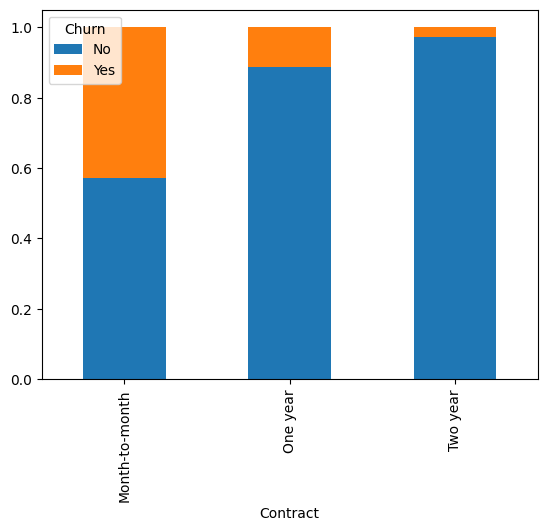

In [18]:
(df_2.groupby('Contract')['Churn'].value_counts(normalize=True)
  .unstack('Churn')
  .plot.bar(stacked=True))


In [19]:
def plot_cat_feature_dist(feature_name):
  (df_2.groupby(feature_name)['Churn'].value_counts(normalize=True)
    .unstack('Churn')
    .plot.bar(stacked=True))


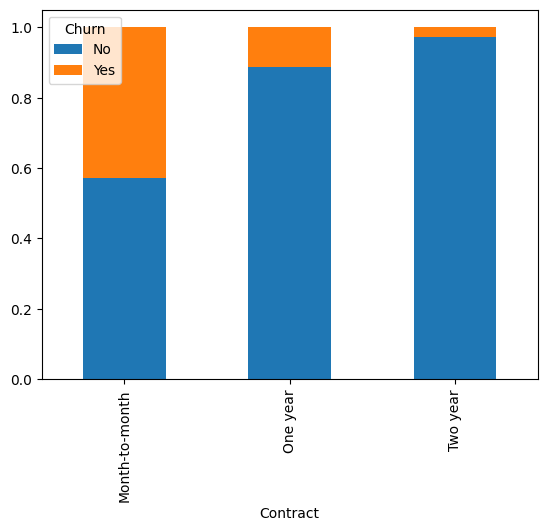

In [21]:
plot_cat_feature_dist('Contract')

In [22]:
df_2['AvgMonthlyCharge'] = df_2['TotalCharges']/df_2['tenure']
df_2['DiffCharges'] = df_2['MonthlyCharges']-df_2['AvgMonthlyCharge']
df_2['DiffCharges'].describe()


count    7032.000000
mean       -0.001215
std         2.616165
min       -18.900000
25%        -1.160179
50%         0.000000
75%         1.147775
max        19.125000
Name: DiffCharges, dtype: float64

In [30]:
df_2['AvgMonthlyCharge'] = df_2['TotalCharges'].div(df_2['tenure']).replace(np.inf,0)
df_2['DiffCharges'] = df_2['MonthlyCharges']-df_2['AvgMonthlyCharge']
df_2['DiffCharges'].describe()


count    7032.000000
mean       -0.001215
std         2.616165
min       -18.900000
25%        -1.160179
50%         0.000000
75%         1.147775
max        19.125000
Name: DiffCharges, dtype: float64

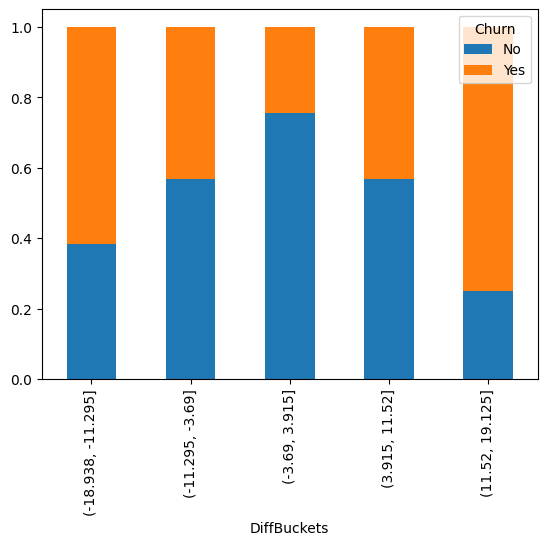

In [31]:
df_2['DiffBuckets'] = pd.cut(df_2['DiffCharges'], bins=5)
plot_cat_feature_dist('DiffBuckets')


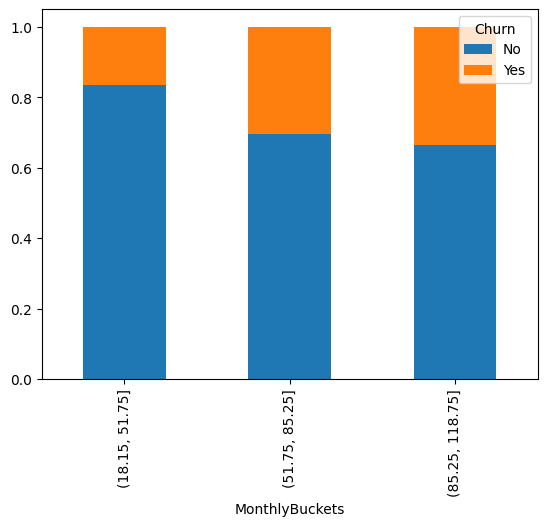

In [32]:
df_2['MonthlyBuckets'] = pd.cut(df_2['MonthlyCharges'], bins=3)
plot_cat_feature_dist('MonthlyBuckets')


In [33]:
df_3 = df_2.copy()
df_3 = df_3.drop(columns=['gender','StreamingTV',
                          'StreamingMovies','PhoneService'])
df_3.columns


Index(['customerID', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'AvgMonthlyCharge', 'DiffCharges', 'DiffBuckets', 'MonthlyBuckets'],
      dtype='object')

In [35]:
df_3 =df_3.drop(columns=['TotalCharges','AvgMonthlyCharge',
                         'DiffCharges','MonthlyBuckets'])


In [37]:
df_3 = df_3.drop(columns=['customerID'])
df_3.dtypes


SeniorCitizen          int64
Partner               object
Dependents            object
tenure                 int64
MultipleLines         object
InternetService       object
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
Contract              object
PaperlessBilling      object
PaymentMethod         object
MonthlyCharges       float64
Churn                 object
DiffBuckets         category
dtype: object

In [39]:
df_prep = df_3.replace('No internet service', 'No')
df_prep[['OnlineSecurity', 'OnlineBackup',
         'DeviceProtection', 'TechSupport']].nunique()


OnlineSecurity      2
OnlineBackup        2
DeviceProtection    2
TechSupport         2
dtype: int64

In [40]:
from sklearn.preprocessing import OneHotEncoder

numeric_columns = ['SeniorCitizen', 'tenure', 'MonthlyCharges']
categorical_columns = ['Partner', 'Dependents', 'MultipleLines',
                       'InternetService','OnlineSecurity',
                       'OnlineBackup','DeviceProtection',
                       'TechSupport','Contract','PaperlessBilling',
                       'PaymentMethod','DiffBuckets']

X_num = df_prep[numeric_columns]
X_cat = df_prep[categorical_columns]

ohe = OneHotEncoder(drop='if_binary')
X_cat_trans = ohe.fit_transform(X_cat)


In [41]:
X_cat_trans.toarray()[0]
ohe.inverse_transform(X_cat_trans.toarray())[0]


array(['Yes', 'No', 'No phone service', 'DSL', 'No', 'Yes', 'No', 'No',
       'Month-to-month', 'Yes', 'Electronic check',
       Interval(-3.69, 3.915, closed='right')], dtype=object)

In [42]:
X = np.concatenate((X_num.values,X_cat_trans.toarray()), axis=1)
y = df_prep['Churn'].values


In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=113)

X_train.shape


(5634, 29)

In [44]:
from sklearn.linear_model import LogisticRegression

cls = LogisticRegression()

cls.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [45]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

cls = LogisticRegression()

cls.fit(X_train_scaled, y_train)


LogisticRegression()

In [46]:
cls.score(X_test, y_test)

0.48119233498935415

In [47]:
X_test_scaled = scaler.transform(X_test)

cls.score(X_test_scaled, y_test)


0.7991483321504613

In [48]:
from sklearn.metrics import confusion_matrix

y_pred = cls.predict(X_test_scaled)

confusion_matrix(y_test, y_pred, labels=['Yes','No'])


array([[187, 185],
       [ 98, 939]])

In [52]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(y_test, y_pred,
                                    labels=['Yes','No'], pos_label='Yes'))

print("Recall:", recall_score(y_test, y_pred,
                              labels=['Yes','No'], pos_label='Yes'))


Precision: 0.656140350877193
Recall: 0.5026881720430108


In [58]:
import json

example = json.loads('{"customerID": "7090-HPOJU", "gender": "Female", "SeniorCitizen": 0, "Partner": "Yes", "Dependents": "Yes", "tenure": 66,"PhoneService": "Yes", "MultipleLines": "Yes", "InternetService": "DSL","OnlineSecurity": "Yes", "OnlineBackup": "Yes", "DeviceProtection": "Yes","TechSupport": "No", "StreamingTV": "No", "StreamingMovies": "No","Contract": "Month-to-month", "PaperlessBilling": "Yes", "PaymentMethod": "Bank transfer (automatic)", "MonthlyCharges": 67.45, "TotalCharges": "4508.65"}')

ex_df = pd.DataFrame([example])
ex_df['TotalCharges'] = ex_df['TotalCharges'].astype('float64')
ex_df = ex_df.drop(columns=['customerID','gender',
                            'StreamingTV','StreamingMovies',
                            'PhoneService'])

ex_df['AvgMonthlyCharge'] = ex_df['TotalCharges']/ex_df['tenure']
ex_df['DiffCharges'] = ex_df['MonthlyCharges']-ex_df['AvgMonthlyCharge']
ex_df['DiffBuckets'] = pd.cut(ex_df['DiffCharges'],
                           bins=[-18.938,-11.295,-3.69,3.915,11.52,19.125])
ex_df.pop('DiffCharges')

numeric_columns = ['SeniorCitizen', 'tenure', 'MonthlyCharges']
categorical_columns = ['Partner', 'Dependents', 'MultipleLines',
                       'InternetService','OnlineSecurity','OnlineBackup',
                       'DeviceProtection','TechSupport','Contract',
                       'PaperlessBilling','PaymentMethod','DiffBuckets']

X_num = df_prep[numeric_columns]
X_cat = df_prep[categorical_columns]

X_cat_trans = ohe.transform(X_cat)

X = np.concatenate((X_num.values,X_cat_trans.toarray()), axis=1)
X_scaled = scaler.transform(X)

cls.predict(X)


array(['Yes', 'Yes', 'Yes', ..., 'Yes', 'Yes', 'Yes'], dtype=object)

In [60]:
import joblib

joblib.dump(cls, 'filename.joblib')

cls = joblib.load('filename.joblib')


In [64]:
def transform_fn(df):

  df = df.replace({'TotalCharges': {' ': 0.0}})
  df = df.astype({'TotalCharges':'float64'})

  df['AvgMonthlyCharge']= df['TotalCharges'].div(df['tenure'],
                                                      fill_values=0.0)

  df['DiffCharges'] = df['MonthlyCharges']-df['AvgMonthlyCharge']

  df['DiffBuckets'] = pd.cut(df['DiffCharges'], bins=5)

  df = df.drop(columns=['AvgMonthlyCharge', 'gender','StreamingTV',
                            'StreamingMovies','PhoneService',
                            'customerID', 'DiffCharges'])
  return df


In [65]:
numeric_columns = ['SeniorCitizen', 'tenure', 'MonthlyCharges']
categorical_columns = ['Partner', 'Dependents', 'MultipleLines',
                      'InternetService','OnlineSecurity',
                      'OnlineBackup', 'DeviceProtection',
                      'TechSupport','Contract',
                      'PaperlessBilling','PaymentMethod',
                      'DiffBuckets']


In [69]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer


fn_transformer = FunctionTransformer(transform_fn)
col_transformer = ColumnTransformer(
  [('ohe', OneHotEncoder(drop='if_binary'), categorical_columns),
  ('sca', MinMaxScaler(), numeric_columns)])
model = LogisticRegression()


In [74]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([('preproc', fn_transformer),
                 ('col_trans', col_transformer),
                 ('model', model)])


TypeError: ignored

In [76]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

le.inverse_transform([1])


array(['Yes'], dtype=object)

In [79]:
import tensorflow as tf
import tensorflow.keras as keras

train_dataset = tf.data.Dataset.from_tensor_slices((X_train_scaled, y_train_enc)).batch(128)

test_dataset = tf.data.Dataset.from_tensor_slices((X_test_scaled, y_test_enc)).batch(1)


In [80]:
keras.layers.Dense(
            units=64, input_shape=(29,), activation="relu",
            name="input_layer"
        )


In [81]:
model = keras.Sequential(
    [
        keras.layers.Dense(
            units=64, input_shape=(29,), activation="relu",
            name="input_layer"
        ),
        keras.layers.Dense(units=32, activation="relu",
                           name="hidden_1"),
        keras.layers.Dense(units=16, activation="relu",
                           name="hidden_2"),
        keras.layers.Dense(units=1, activation="sigmoid",
                           name="output"),
    ]
)


In [82]:
loss_fn = keras.losses.BinaryCrossentropy()
metrics = [tf.keras.metrics.BinaryAccuracy(),
           tf.keras.metrics.Precision(),
           tf.keras.metrics.Recall()]

model.compile(optimizer="adam", loss=loss_fn, metrics=metrics)


In [83]:
history = model.fit(
    x=train_dataset,
    epochs=20,
    validation_data=test_dataset
)


Epoch 1/20
45/45 [==============================] - 5s 53ms/step - loss: 0.5412 - binary_accuracy: 0.7231 - precision: 0.2110 - recall: 0.0154 - val_loss: 0.4728 - val_binary_accuracy: 0.7537 - val_precision: 0.6923 - val_recall: 0.1210
Epoch 2/20
45/45 [==============================] - 3s 60ms/step - loss: 0.4466 - binary_accuracy: 0.7792 - precision: 0.6264 - recall: 0.4188 - val_loss: 0.4484 - val_binary_accuracy: 0.7892 - val_precision: 0.6325 - val_recall: 0.4812
Epoch 3/20
45/45 [==============================] - 3s 61ms/step - loss: 0.4301 - binary_accuracy: 0.7923 - precision: 0.6286 - recall: 0.5337 - val_loss: 0.4434 - val_binary_accuracy: 0.7942 - val_precision: 0.6486 - val_recall: 0.4812
Epoch 4/20
45/45 [==============================] - 3s 62ms/step - loss: 0.4228 - binary_accuracy: 0.7978 - precision: 0.6398 - recall: 0.5471 - val_loss: 0.4420 - val_binary_accuracy: 0.8006 - val_precision: 0.6655 - val_recall: 0.4919
Epoch 5/20
45/45 [==============================] - 

In [84]:
early_stopping = keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True)

history = model.fit(
    x=train_dataset,
    epochs=100,
    validation_data=test_dataset,
    callbacks = [early_stopping]
)


Epoch 1/100
45/45 [==============================] - 3s 78ms/step - loss: 0.3799 - binary_accuracy: 0.8186 - precision: 0.6863 - recall: 0.5845 - val_loss: 0.4482 - val_binary_accuracy: 0.7963 - val_precision: 0.6341 - val_recall: 0.5403
Epoch 2/100
45/45 [==============================] - 3s 65ms/step - loss: 0.3781 - binary_accuracy: 0.8195 - precision: 0.6881 - recall: 0.5865 - val_loss: 0.4495 - val_binary_accuracy: 0.7949 - val_precision: 0.6301 - val_recall: 0.5403
Epoch 3/100
45/45 [==============================] - 2s 40ms/step - loss: 0.3761 - binary_accuracy: 0.8209 - precision: 0.6909 - recall: 0.5898 - val_loss: 0.4504 - val_binary_accuracy: 0.7935 - val_precision: 0.6278 - val_recall: 0.5349
Epoch 4/100
45/45 [==============================] - 2s 40ms/step - loss: 0.3742 - binary_accuracy: 0.8200 - precision: 0.6891 - recall: 0.5878 - val_loss: 0.4519 - val_binary_accuracy: 0.7935 - val_precision: 0.6278 - val_recall: 0.5349
Epoch 5/100
45/45 [=============================

In [85]:
model.evaluate(x=test_dataset)

1409/1409 [==============================] - 2s 2ms/step - loss: 0.4482 - binary_accuracy: 0.7963 - precision: 0.6341 - recall: 0.5403


[0.44818437099456787,
 0.7963094115257263,
 0.6340693831443787,
 0.5403226017951965]